In [1]:
#importamos las librerias a utilizar para el analisis de la red neuronal
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math

In [2]:
#importamos los datos prestados por Zalando que ya tiene un repositorio de 70 mil imagenes a blanco y negro 
#separados en 60 mil datos de entrenamiento y 10 mil datos de prueba.
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

In [4]:
#hacemos la separacion de los datos correspondientes en dos variables.
datos_emtrenamiento, datos_prueba = datos['train'],datos['test']
#hacemso la validacion de como estan organizados las imagenes en una variable.
nombre_clases = metadatos.features['label'].names

In [5]:
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#Normalizar los datos (pasar de 0-255 a 0-1)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #aqui lo pasa de 0-255 a 0-1
  return imagenes,etiquetas

#Normalizamos los datos de entrenamiento y probamos la funcion ya realizada
datos_emtrenamiento = datos_emtrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)

#Agregamos a cache(guarda los datos en memoria y no en el disco, mas rapido)
datos_emtrenamiento = datos_emtrenamiento.cache()
datos_prueba = datos_prueba.cache()

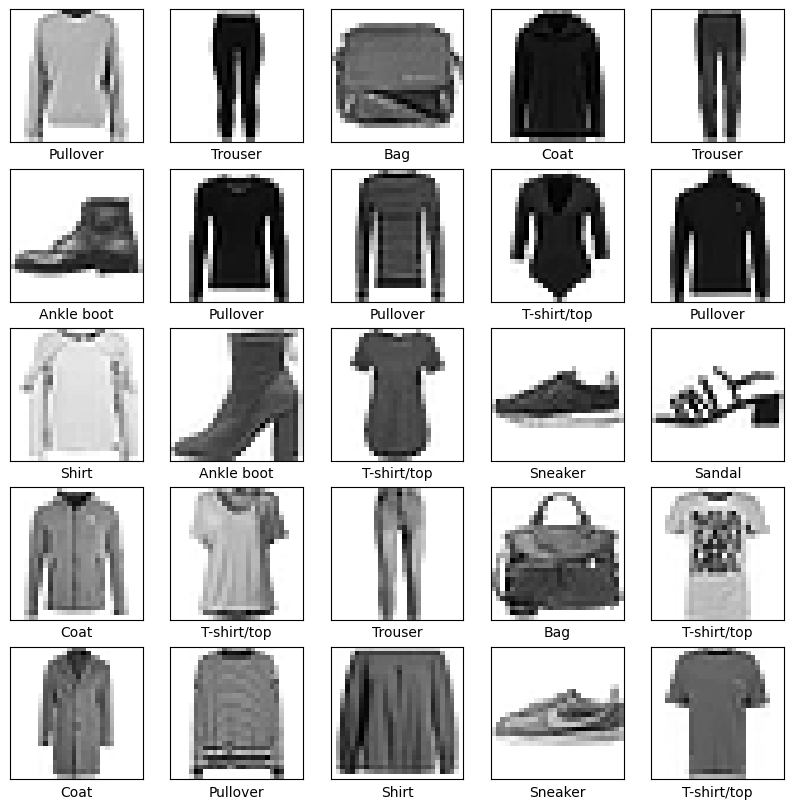

In [7]:
#Mostrar unas imagenes de los datos de prueba, y como vienen clasificadas
plt.figure(figsize=(10,10))

for i,(imagen, etiqueta) in enumerate(datos_emtrenamiento.take(25)):
  imagen= imagen.numpy().reshape((28,28))#Redimencionamos
  #dibujamos las imagenes
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombre_clases[etiqueta])
plt.show()

In [8]:
#Creamos el modelo

#creamos una red de tipo secuencial
modelo = tf.keras.Sequential([
    #capa de entrada 
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # covierte las dimenciones anteriores a una sola de 784
    #capas ocultas cada una con 40 neuronas.
    tf.keras.layers.Dense(40, activation = tf.nn.relu),
    tf.keras.layers.Dense(40, activation = tf.nn.relu),
    tf.keras.layers.Dense(40, activation = tf.nn.relu),
    #capa da salida de la red neuronal
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])


In [9]:
#Compilar el Modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
numero_entrenamiento = metadatos.splits['train'].num_examples
numero_prueba = metadatos.splits['test'].num_examples

In [11]:
#Preparamos la compilacion por lotes para que entrene mas rapido

lote = 32

#se ajustan los datos de entrenamiento y prueba,
#se daran varias vueltas y lo vamos hacer de forma aleatoria y no en orden repeat y shuffle
#batch le indica el tamaño del lote
datos_emtrenamiento = datos_emtrenamiento.repeat().shuffle(numero_entrenamiento).batch(lote)
datos_prueba=datos_prueba.batch(lote)

In [12]:
#Entrenar la red Neuronal

historial = modelo.fit(datos_emtrenamiento, epochs=15, steps_per_epoch=math.ceil(numero_entrenamiento/lote))

Epoch 1/15
1875/1875 [==============================] - 12s 2ms/step - loss: 0.5342 - accuracy: 0.8125
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3924 - accuracy: 0.8590
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8696
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3334 - accuracy: 0.8779
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3207 - accuracy: 0.8808
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.8866
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8931
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.8933
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.8958
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.26

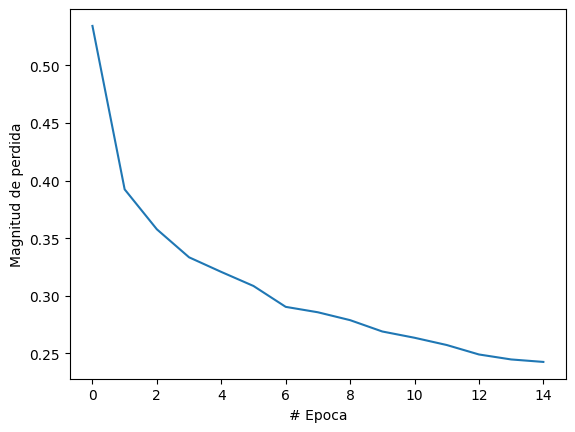

In [13]:
#para visualizar la perdida
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

1/1 [==============================] - 0s 105ms/step


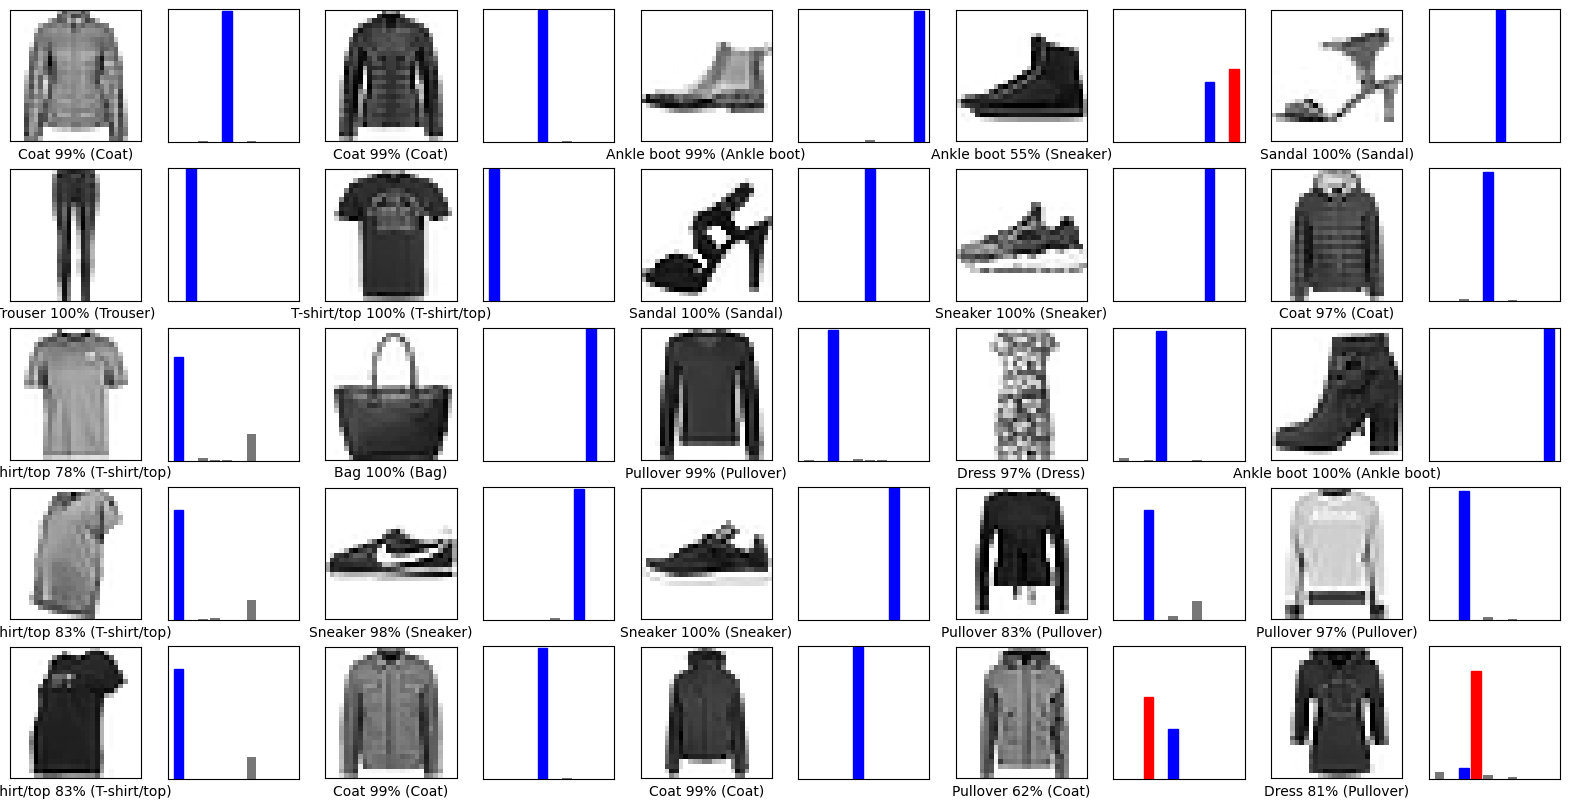

In [14]:
import numpy as np

#realizo lo mismo que en video para validar y para que me quede la informacion como conocimiento.
#aca valida las imagenes y verifica si hay depronto algun error,
#y confirmando si la red neuronal corre correctamente, esta red tiene una taza de efectividad del 90%.
#La primera funcion recorremos las imagenes; y en la segunda funcion recorremos los 
#datos y los comparamos con los analizis.
#al final damos unos parametro para comparar y mostrar los resultados graficamente

for imagenes_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiqueta_prueba= etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagene(i, arr_predicciones,etiqueta_reales,imagenen):
  arr_predicciones, etiqueta_reales,img = arr_predicciones[i],etiqueta_reales[i], imagenen[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_reales:
    color ='blue'#si acerto 
  else:
    color = 'red'#no acerto

  plt.xlabel("{} {:2.0f}% ({})".format(
      nombre_clases[etiqueta_prediccion],
      100*np.max(arr_predicciones),
      nombre_clases[etiqueta_reales],
      color=color
  ))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_reales):
  arr_predicciones, etiqueta_reales = arr_predicciones[i], etiqueta_reales[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color='#777777')
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_reales].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagene(i, predicciones, etiqueta_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiqueta_prueba)

In [15]:
#Tomar cualquier indice del set de pruebas para ver su prediccion
imagen = imagenes_prueba[5]
imagen = np.array([imagen])
predicciones = modelo.predict(imagen)

print("Prediccion: " + nombre_clases[np.argmax(predicciones[0])])

1/1 [==============================] - 0s 75ms/step
Prediccion: Trouser


-RED NEURONAL SECUENCIAL:
**texto en negrita**
En el modelo de redes secuenciales la predicción realizada por una red neuronal para un intervalo de tiempo actúa a su vez como variable explicativa o de entrada en otra red dedicada a la predicción de otro intervalo anterior o posterior. De esta forma, el intervalo correspondiente a la primera red neuronal actúa como intervalo informativo y el intervalo correspondiente a la segunda red neuronal actúa como intervalo informado. Siguiendo este esquema se cruzaron los modelos jerárquicos correspondientes a los intervalos de tiempo, generándose redes secuenciales.

-FLATTEN:

Esta capa convierte la imagen de tres dimensiones a una sola.

-RELU-RECTIFIED:

La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.

-SOFTMAX:

Asegura que la sumatoria de las neuronas de salida siempre de un valor de 1, y al final escoge el valor mayor para idenficar que es es mas cercano al resultado requerido.

-losses.SparseCategoricalCrossentropy:

Es una función que evalúa la desviación entre las predicciones realizadas por la red neuronal y los valores reales de las observaciones utilizadas durante el aprendizaje.

-FIT:

fit() las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (epochs) de entrenamiento.


-FORMAT:

nos permite incluir en una cadena, texto ordinario y caracteres de formateo, que representan un tipo en particular de datos, tales como entero, cadena o flotante